In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import math
import numpy as np

In [11]:
spotify_df = pd.read_csv("./final_data.csv")
artist_df = spotify_df[spotify_df['artist_name'] == 'Eminem']
artist_df.describe()

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,e_grammy,e_billboard,e_spotify
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,255.428260,0.450725,5.855072,-5.917319,0.594203,244.556304,121.600014,3.884058,0.043478,17.695652,50.927536
std,78.970256,1.136134,3.874029,4.038794,0.494643,75.867338,33.610623,0.738365,0.205425,38.563662,11.990583
min,29.805260,0.000000,0.000000,-24.945000,0.000000,29.805000,59.553000,1.000000,0.000000,0.000000,23.000000
25%,227.160360,0.000000,1.000000,-6.760000,0.000000,212.009000,90.992000,4.000000,0.000000,0.000000,45.000000
50%,267.258320,0.000000,7.000000,-4.941000,1.000000,254.862000,114.041000,4.000000,0.000000,0.000000,50.000000
75%,312.267300,0.276000,10.000000,-3.799000,1.000000,293.634000,156.982000,4.000000,0.000000,0.000000,55.000000
max,397.609340,6.908000,11.000000,-0.558000,1.000000,373.696000,184.045000,5.000000,1.000000,119.000000,86.000000


In [12]:
def drop_specific_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

def results(y, preds,type):
    print('R² score: \n',r2_score(y,preds))
    print('RSME: \n',math.sqrt(mean_squared_error(y,preds)))
    print('MAE: \n',mean_absolute_error(y,preds))
    plt.plot(y,preds, 'ro')
    x = np.linspace(min(min(y),min(preds)), max(max(y),max(preds)), 100)
    plt.plot(x,x)
    plt.xlabel('Valor real')
    plt.ylabel('Valor predit')
    plt.title('Èxit a billboard amb '+ type)
    plt.show()
    

In [13]:
artist_df = drop_specific_cols(artist_df, ['e_grammy', 'e_billboard'])


In [14]:
#variable to predict
y = artist_df.e_spotify

In [15]:
#features
#we do not consider 'key' based on boxplot observation (title and artist name are not physical variables)
spotify_features = ['duration', 'end_of_fade_in', 'loudness', 'mode','start_of_fade_out', 'tempo', 'time_signature']
X = artist_df[spotify_features]

In [16]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0,test_size=0.25)

In [17]:
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(train_X, train_y)
rf_spotify_preds = forest_model.predict(val_X)


R² score: 
 -0.21548356116480138
RSME: 
 15.362743714728968
MAE: 
 11.41722222222222


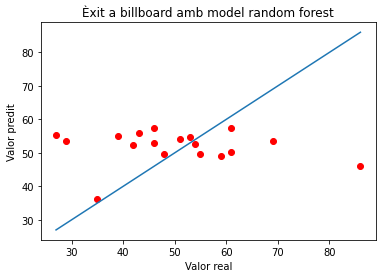

In [18]:
results(val_y, rf_spotify_preds, 'model random forest')

In [19]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [20]:
svr_model = SVR(kernel='rbf')
svr_model.fit(train_X, train_y)
svr_spotify_preds = svr_model.predict(val_X)

R² score: 
 -0.005785142697793955
RSME: 
 13.974840145445382
MAE: 
 10.798816902708017


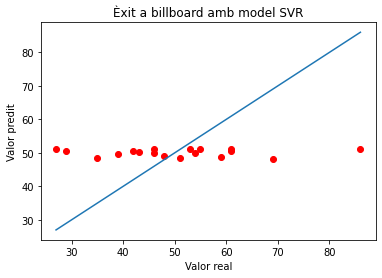

In [21]:
results(val_y, svr_spotify_preds,'model SVR')

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [23]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(train_X, train_y)
knn_spotify_preds = knn_model.predict(val_X)

R² score: 
 0.03766149542217723
RSME: 
 13.669674465765452
MAE: 
 10.211111111111112


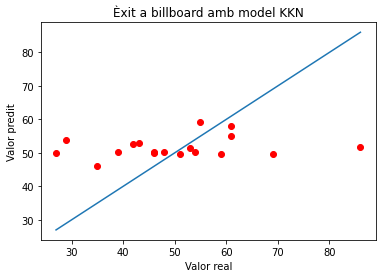

In [24]:
results(val_y, knn_spotify_preds, 'model KKN')

In [25]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [26]:
logistic_model = LogisticRegression(random_state=1, solver='lbfgs', multi_class='auto')
logistic_model.fit(train_X, train_y)
logistic_spotify_preds = logistic_model.predict(val_X)

R² score: 
 -0.20453967446592047
RSME: 
 15.293426329272616
MAE: 
 11.11111111111111


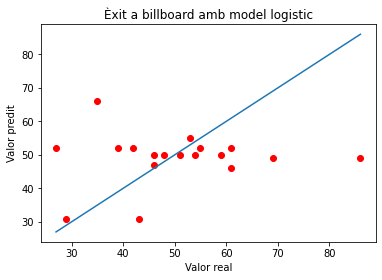

In [27]:
results(val_y, logistic_spotify_preds, 'model logistic')